# Customer Behaviour

The data represents detailed information about the company's 400 customers, including unique identifiers, gender, customer age, and salary. In addition, information is collected about the purchase decision - whether or not a customer decides to purchase a particular product.
The task is to create a model using logistic regression to predict whether a given customer will make a purchase based on the data provided. Our function ( estimated salary) will be used to predict the binary outcome (will make a purchase or not).

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
data = pd.read_csv('Customer_Behaviour.csv')
print(data.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


In [40]:
print(data.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


An estimate of the number of missing values in each column of the dataset.

In [41]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Сorrelation analysis

It is suggested to first understand and model the relationship between the dependent variable (Purchased) and the independent variables (User ID, Age, Gender, EstimatedSalary). Through a careful examination of these variables, it is possible to try to identify which factors have a statistically significant influence on the purchase decision to predict consumer behavior with greater confidence. 

                 User ID  Gender   Age  EstimatedSalary  Purchased
User ID             1.00    0.03 -0.00             0.07       0.01
Gender              0.03    1.00  0.07             0.06       0.04
Age                -0.00    0.07  1.00             0.16       0.62
EstimatedSalary     0.07    0.06  0.16             1.00       0.36
Purchased           0.01    0.04  0.62             0.36       1.00


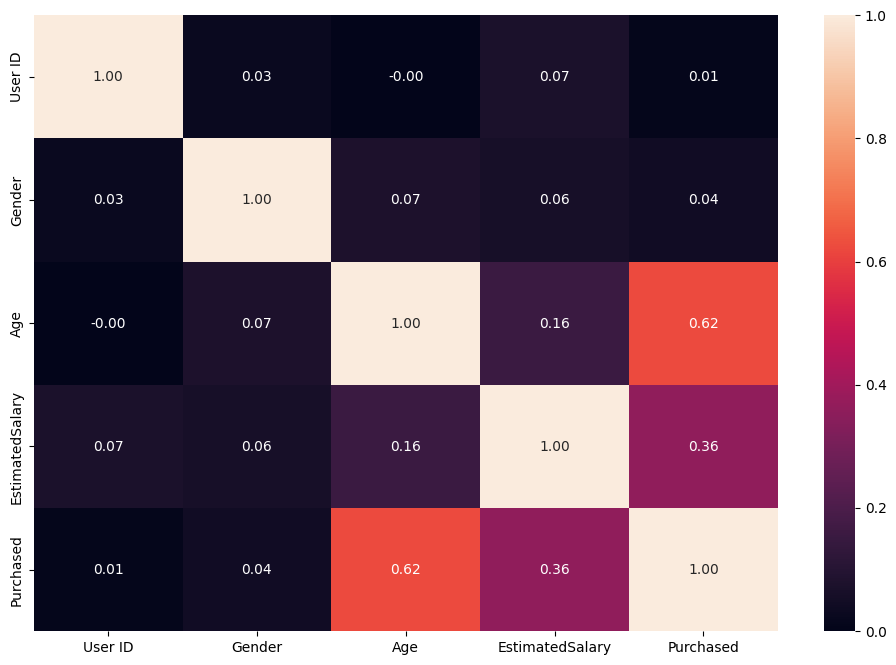

In [42]:
data['Gender'] = data['Gender'].replace('Male', 0)
data['Gender'] = data['Gender'].replace('Female', 1)

pd.options.display.float_format = '{:,.2f}'.format
correlation_matrix = data.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

According to this graph, the correlation between age and purchase is about 0.62, indicating a strong positive relationship.

#### Logistic Regression

In [43]:
df_annual_data = pd.DataFrame(data, columns =["Age", "Purchased"])
df_annual_data.head(10)

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
5,27,0
6,27,0
7,32,1
8,25,0
9,35,0


In [44]:
colums_target = ['Purchased']
colums_train = ['Age']
X = data[colums_train]
Y = data[colums_target].values.ravel() 

In [45]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
log_regression = LogisticRegression()

In [46]:

log_regression.fit(X_train, Y_train)

LogisticRegression()

In [47]:
Y_pred = log_regression.predict(X_test)

Evaluation of model performance

In [48]:
Evaluation = log_regression.score(X_test, Y_test)
print(f"Evaluation of the logistic regression model: {Evaluation:.2f}")


Evaluation of the logistic regression model: 0.88


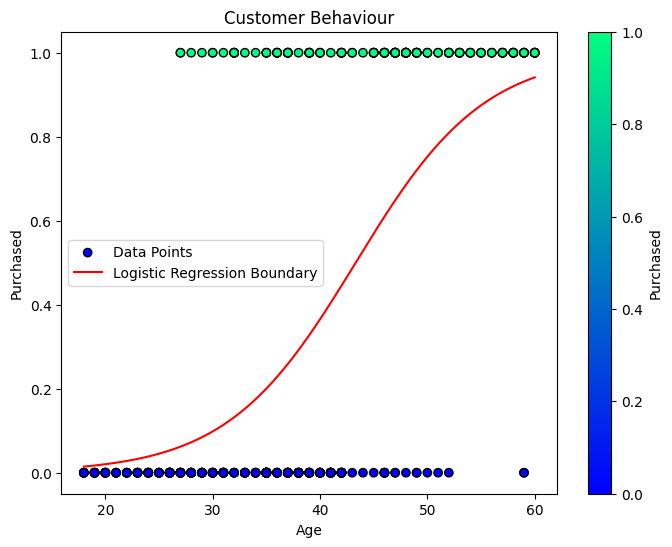

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Age'], Y, c=Y, cmap='winter', edgecolors='k', label='Data Points')
plt.xlabel('Age')
plt.ylabel('Purchased')

X_test_range = np.linspace(X['Age'].min(), X['Age'].max(), 300)
X_test_range_df = pd.DataFrame(X_test_range, columns=colums_train)
Y_prob = log_regression.predict_proba(X_test_range_df)[:, 1]
plt.plot(X_test_range, Y_prob, color='red', label='Logistic Regression Boundary')

plt.title('Customer Behaviour')
plt.legend()
plt.colorbar(label='Purchased')
plt.show()

Both graphs confirm that age is an important predictor of purchase. 
* Younger people make fewer purchases and the likelihood of making a purchase increases with age.
* People under the age of 30 tend to be less likely to make a purchase, as shown by the large number of blue dots at the bottom of the graph.
* As age increases, starting around age 30, the likelihood of making a purchase increases.
* In the 40 to 50 age category, the probability curve rises sharply, indicating a significant increase in the probability of purchase.
* Among the older category of people (over 50 years of age), almost all observations indicate making a purchase.
Thus, age can be considered as a target demographic attribute in marketing strategies aimed at increasing sales.

Logistic regression with two independent variables

Based on analysing the correlation between age and perceived income, it is observed that as age increases, people's income tends to increase. The inclusion of perceived salary in the logistic regression model will provide an indication of how much this economic indicator influences purchase decisions.

In [50]:
df_annual_data = pd.DataFrame(data, columns =["Age", 'EstimatedSalary', "Purchased"])  
df_annual_data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [51]:
X = data[['EstimatedSalary', 'Age']].values  
Y = data['Purchased'].values  

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

log_regression = LogisticRegression()
log_regression.fit(X_train, Y_train)

Y_pred = log_regression.predict(X_test)

Evaluation of model performance

In [53]:
accuracy = log_regression.score(X_test, Y_test)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

Accuracy of the logistic regression model: 0.61


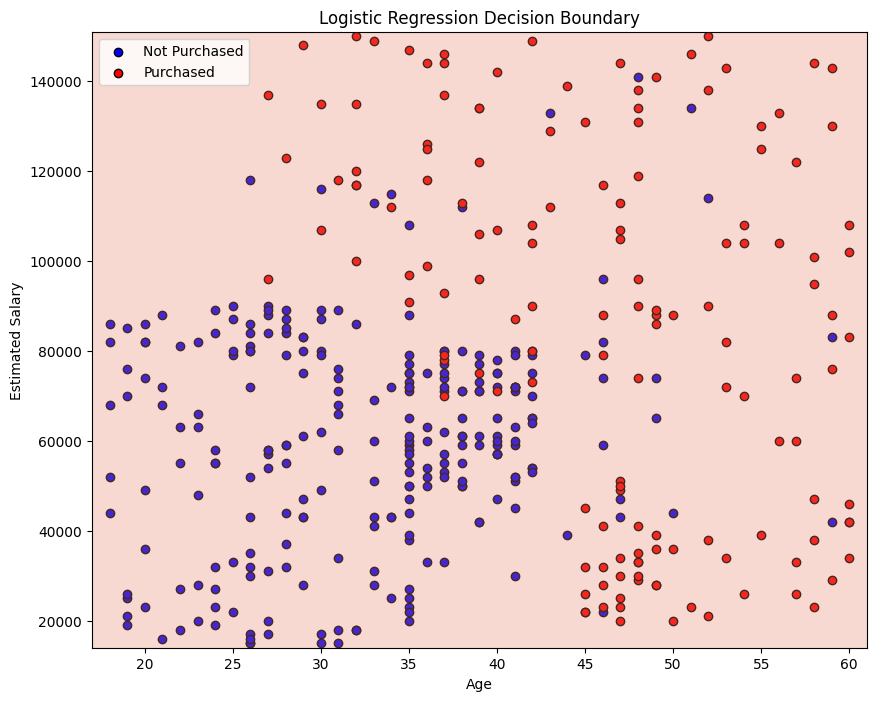

In [54]:
plt.figure(figsize=(10, 8))

# Отображение точек данных
plt.scatter(X[Y == 0][:, 1], X[Y == 0][:, 0], color='blue', label='Not Purchased', edgecolors='k')
plt.scatter(X[Y == 1][:, 1], X[Y == 1][:, 0], color='red', label='Purchased', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Создание сетки значений для построения контуров
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 0].min() - 1000, X[:, 0].max() + 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_regression.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Построение контурного графика для отображения границы решения
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

#### Conclusion¶

The graph shows that there is a tendency for the number of purchases to increase with age and with an increase in the expected salary. This is especially noticeable in the segment of the age group over 40 with a salary above 80,000.
Understanding how age and income affect purchasing behaviour can help companies tailor their products and services to meet the specific needs and preferences of different age and income groups.